In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Schemes import *
from PIL import Image

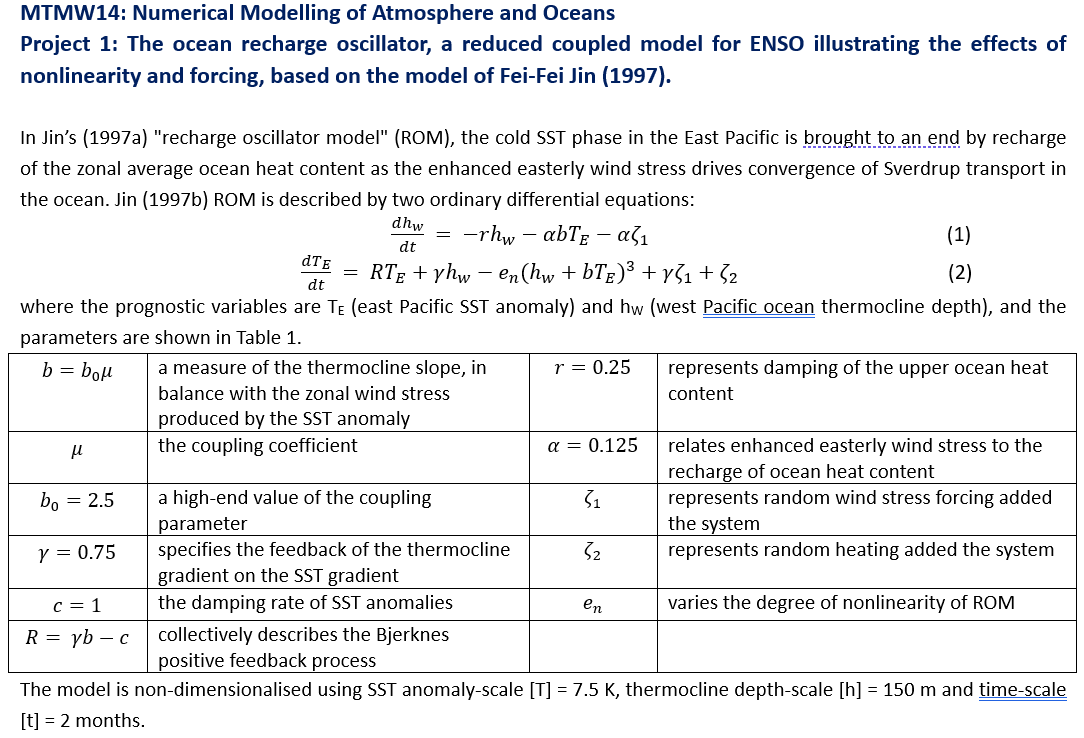

In [2]:
Image.open("background information.png")

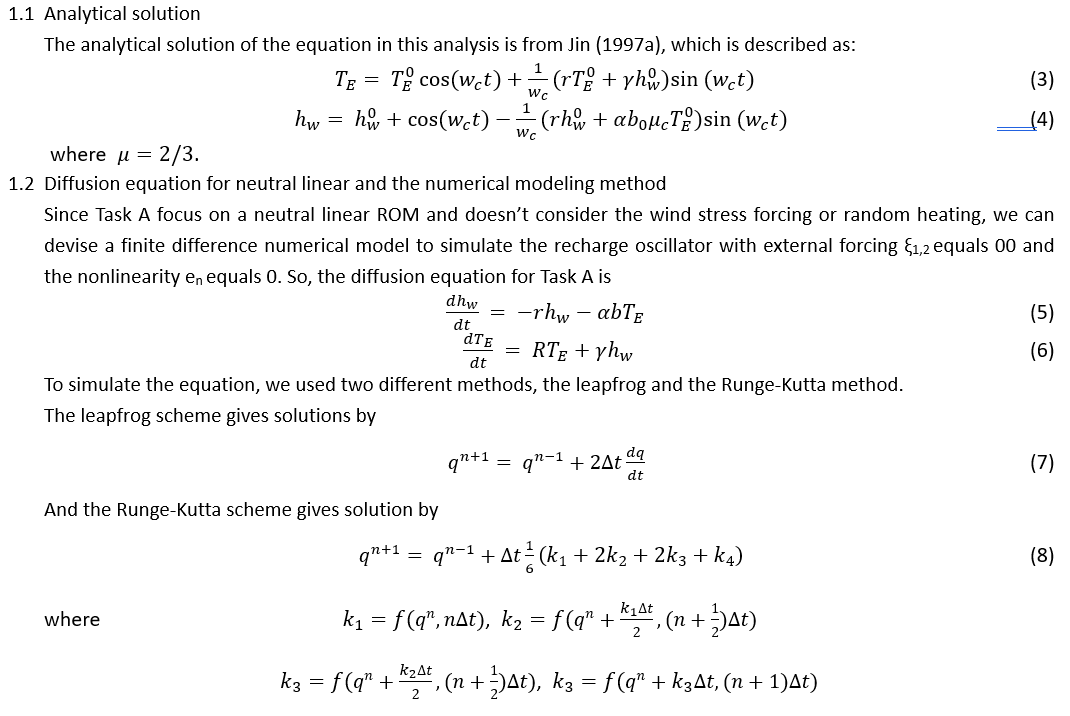

In [3]:
Image.open("scheme.png")

The Runge-Kutta is a fourth-order-accurate model

In [4]:
b0,gamma,c,r,alpha,miu = setup_A['b0'],setup_A['gamma'],setup_A['c'],setup_A['r'],setup_A['alpha'],setup_A['miu']
wc,T0,h0,nt = setup_A['wc'],setup_A['T0'],setup_A['h0'],setup_A['nt']

In [5]:
### Analytical solution & leapfrog & Runge-Kutta
b = b0*miu                  ### a measure of the thermocline slope
R = gamma * b - c                ### Bjerknes positive feedback progress
tc = 2 * np.pi/wc
dt = tc/nt
hw_lf, TE_lf = lf(nt,10,h0,T0,R,dt,r,gamma,alpha,b)
hw_rk, TE_rk = RK(nt,10,h0,T0,R,dt,r,gamma,alpha,b)
hw_an, TE_an = ansol(nt,10,h0,T0,wc,dt,r,gamma,alpha,b)

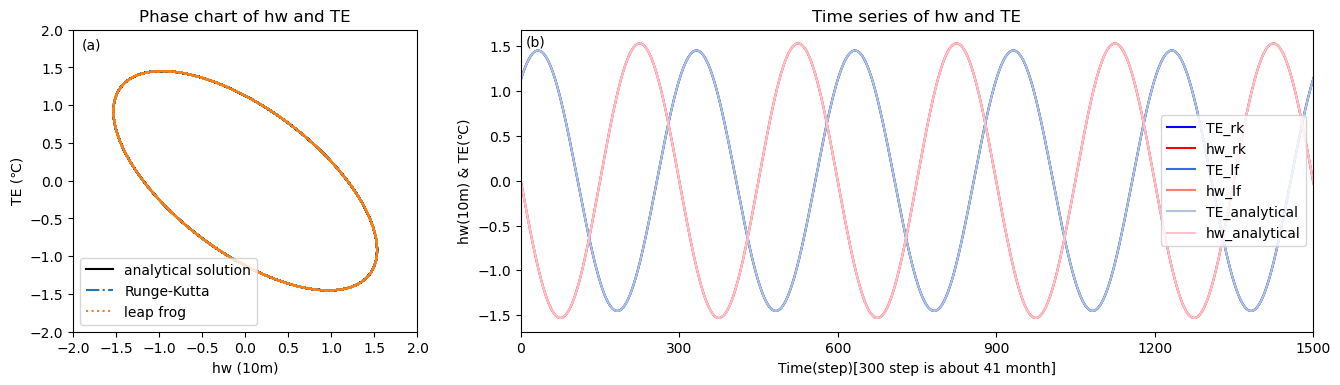

Figure 1 (a) Phase chart and (b) time series of hw and TE with the analytical solution, leapfrog model and the Runge-Kutta model


In [6]:
fig = plt.figure(figsize=(16,4), dpi=100) 
grid = plt.GridSpec(1,3,wspace = 0.3,hspace = 0)
ax2 = plt.subplot(grid[0,0])
plt.plot(hw_an*15,TE_an*7.5,"black",label = "analytical solution")
plt.plot(hw_rk*15,TE_rk*7.5,"-.",label = "Runge-Kutta")
plt.plot(hw_lf*15,TE_lf*7.5,":",label = "leap frog")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("hw (10m)")
plt.ylabel("TE (℃)")
ax2.set_title("Phase chart of hw and TE")
plt.text(-1.9,1.75,"(a)")
ax1 = plt.subplot(grid[0,1:3])
ax1.plot(TE_rk*7.5,"blue",label = "TE_rk")
ax1.plot(hw_rk*15,"red",label = "hw_rk")
ax1.plot(TE_lf*7.5,"royalblue",label = "TE_lf")
ax1.plot(hw_lf*15,"salmon",label = "hw_lf")
ax1.plot(TE_an*7.5,"lightsteelblue",label = "TE_analytical")
ax1.plot(hw_an*15,"pink",label = "hw_analytical")
ax1.legend()
ax1.set_title("Time series of hw and TE")
xtick = [0*nt,1*nt,2*nt,3*nt,4*nt,5*nt]
plt.xlim(0,5*nt)
ax1.set_xticks(xtick)
ax1.set_xlabel("Time(step)[300 step is about 41 month]")
ax1.set_ylabel("hw(10m) & TE(℃)")
plt.text(10,1.5,"(b)")
plt.show()
print("Figure 1 (a) Phase chart and (b) time series of hw and TE with the analytical solution, leapfrog model and the Runge-Kutta model")

From figure 1, it can be noticed that the model of leapfrog and Runge-Kutta both simulate well with the analytical solution for the lines of the three groups overlap with each other for both time series plot and phase chart of TE and hw. The TE regularly oscillates from -1.5 to 1.5 ℃ and hw oscillates in the range from -15 to 15m. The crest of hw appears around 3/4 period late to the TE.
By comparing the two models with the analytical solution, it’s obvious that the two models are stable for both don’t appear any damping or forcing trend, and they both fit the analytical results well.

In [7]:
# Re-run your model for 5 periods with a value of µ > 2/3 and µ < 2/3
miu = 0.6                           ### coupling coefficient
b = b0 * miu                         ### a measure of the thermocline slope
R = gamma * b - c                    ### Bjerknes positive feedback progress
hw_lf_mius, TE_lf_mius = lf(nt,5,h0,T0,R,dt,r,gamma,alpha,b)
hw_rk_mius, TE_rk_mius = RK(nt,5,h0,T0,R,dt,r,gamma,alpha,b)

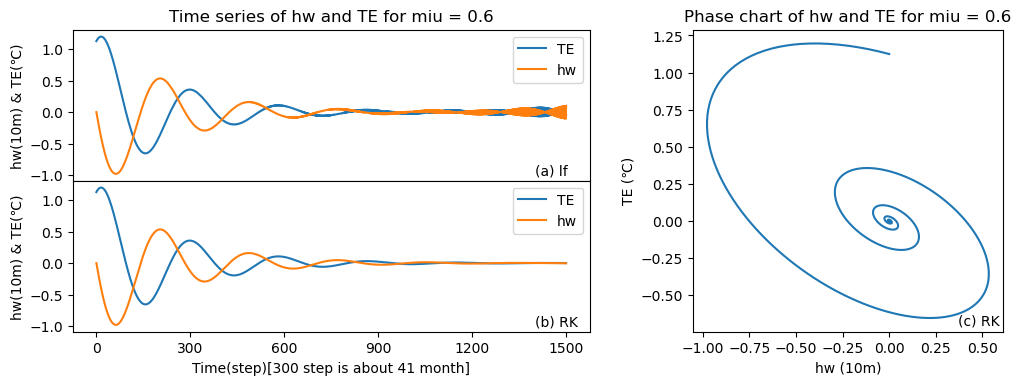

Figure 2 Time series of hw and TE for miu = 0.6 with (a)RK scheme and (b)lf scheme, and (c) the phase chart of hw and TE with RK scheme


In [8]:
fig = plt.figure(figsize=(12,4), dpi=100) 
grid = plt.GridSpec(2,5, wspace = 1,hspace = 0)
ax1 = plt.subplot(grid[0,0:3])
ax1.plot(TE_lf_mius*7.5,label = "TE")
ax1.plot(hw_lf_mius*15,label = "hw")
ax1.set_title("Time series of hw and TE for miu = 0.6")
ax1.set_ylabel("hw(10m) & TE(℃)")
ax1.legend()
plt.text(1400,-1,"(a) lf")
ax2 = plt.subplot(grid[1,0:3])
ax2.plot(TE_rk_mius*7.5,label = "TE")
ax2.plot(hw_rk_mius*15,label = "hw")
ax2.legend()
ax2.set_xticks(xtick)
ax2.set_xlabel("Time(step)[300 step is about 41 month]")
ax2.set_ylabel("hw(10m) & TE(℃)")
plt.text(1400,-1,"(b) RK")
ax3 = plt.subplot(grid[:,3:])
plt.plot(hw_rk_mius*15,TE_rk_mius*7.5)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.xlabel("hw (10m)")
plt.ylabel("TE (℃)")
ax3.set_title("Phase chart of hw and TE for miu = 0.6")
plt.text(0.37,-0.7,"(c) RK")
plt.show()
print("Figure 2 Time series of hw and TE for miu = 0.6 with (a)RK scheme and (b)lf scheme, and (c) the phase chart of hw and TE with RK scheme")

Leapfrog scheme tend to be unstable with the increasing steps,so in the coming parts ,we do not consider the leapfrog scheme anymore.
In comparison, the Runge-Kutta scheme appears to be more stable. Both these two scheme illustrate an obvious damping with the time step.

In [9]:
# Re-run your model for 5 periods with a value of µ > 2/3 and µ < 2/3
miu = 0.7                           ### coupling coefficient
b = b0 * miu                         ### a measure of the thermocline slope
R = gamma * b - c                    ### Bjerknes positive feedback progress
wc = (3/32)**0.5                     ### frequency
tc = 2 * np.pi/wc                    ### period (about 41 months)

In [10]:
hw_rk_miul, TE_rk_miul = RK(nt,10,h0,T0,R,dt,r,gamma,alpha,b)

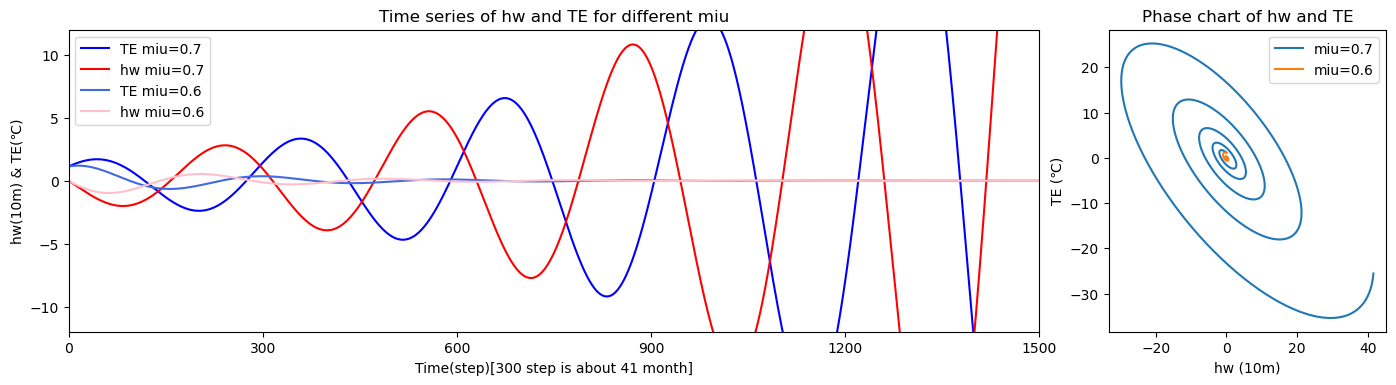

Figure 3 Time series and phase chart of hw and TE for miu = 0.7 and miu = 0.6


In [11]:
fig = plt.figure(figsize=(17,4), dpi=100) 
grid = plt.GridSpec(1,4,wspace = 0.25,hspace = 0)
ax = plt.subplot(grid[0,0:3])
ax.plot(TE_rk_miul*7.5,"blue",label = "TE miu=0.7")
ax.plot(hw_rk_miul*15,"red",label = "hw miu=0.7")
ax.plot(TE_rk_mius*7.5,"royalblue",label = "TE miu=0.6")
ax.plot(hw_rk_mius*15,"pink",label = "hw miu=0.6")
ax.set_xticks(xtick)
ax.set_xlim(0,5*nt)
ax.set_ylim(-12,12)
ax.legend()
ax.set_title("Time series of hw and TE for different miu")
ax.set_xlabel("Time(step)[300 step is about 41 month]")
ax.set_ylabel("hw(10m) & TE(℃)")
ax1 = plt.subplot(grid[0,3])
plt.plot(hw_rk_miul[0:5*nt]*15,TE_rk_miul[0:5*nt]*7.5,label = "miu=0.7")
plt.plot(hw_rk_mius[0:5*nt]*15,TE_rk_mius[0:5*nt]*7.5,label = "miu=0.6")
plt.xlabel("hw (10m)")
plt.ylabel("TE (℃)")
ax1.legend()
ax1.set_title("Phase chart of hw and TE")
plt.show()
print("Figure 3 Time series and phase chart of hw and TE for miu = 0.7 and miu = 0.6")

By comparing the time series and the phase chart of hw and TE for miu larger or smaller than its critical value, it's noticed that with a smaller miu value, both hw and TE show a damping trend, and for a larger miu, they show a forcing trend. Both of these two cases show very unstable simulation. The critical value of miu is in the middle and oscillate regularly and stable. Similar result can be reached with the phase chart.

In [12]:
### Task C

In task C, we extended ROM to include the impact of non-linearity, and test the different miu value

Figure 4 compares the cases of with or without nonlinearity for cirtical miu and beyond critical miu. As for the cases with critical miu, both TE and hw shows a small and relatively stable damping when adding the nonlinearity. This can also be found in the phase chart where the orange line gradually circled to the center and the damping becomes smaller and smaller with the time step. However for the cases with miu larger than the critical value which is chosen as 0.7, TE and hw both show a small forcing trend for about 3 period and then remain at a constant oscilation range.It can be considered that the nonlinearity can largely increase the stability when the miu is larger than is critical value.

In [13]:
### setting values of model parameters for Task C
miu = 2/3                           ### coupling coefficient
b = b0 * miu                        ### a measure of the thermocline slope
R = gamma * b - c                   ### Bjerknes positive feedback progress
en = 0.1
hw_rk_nl,TE_rk_nl = RK_nl(nt,8,h0,T0,R,dt,r,gamma,alpha,b,en)

In [14]:
### setting values of model parameters for Task C
miu = 0.7                            ### coupling coefficient
b = b0 * miu                        ### a measure of the thermocline slope
R = gamma * b - c                   ### Bjerknes positive feedback progress
hw_rk_nl_l,TE_rk_nl_l = RK_nl(nt,8,h0,T0,R,dt,r,gamma,alpha,b,en)

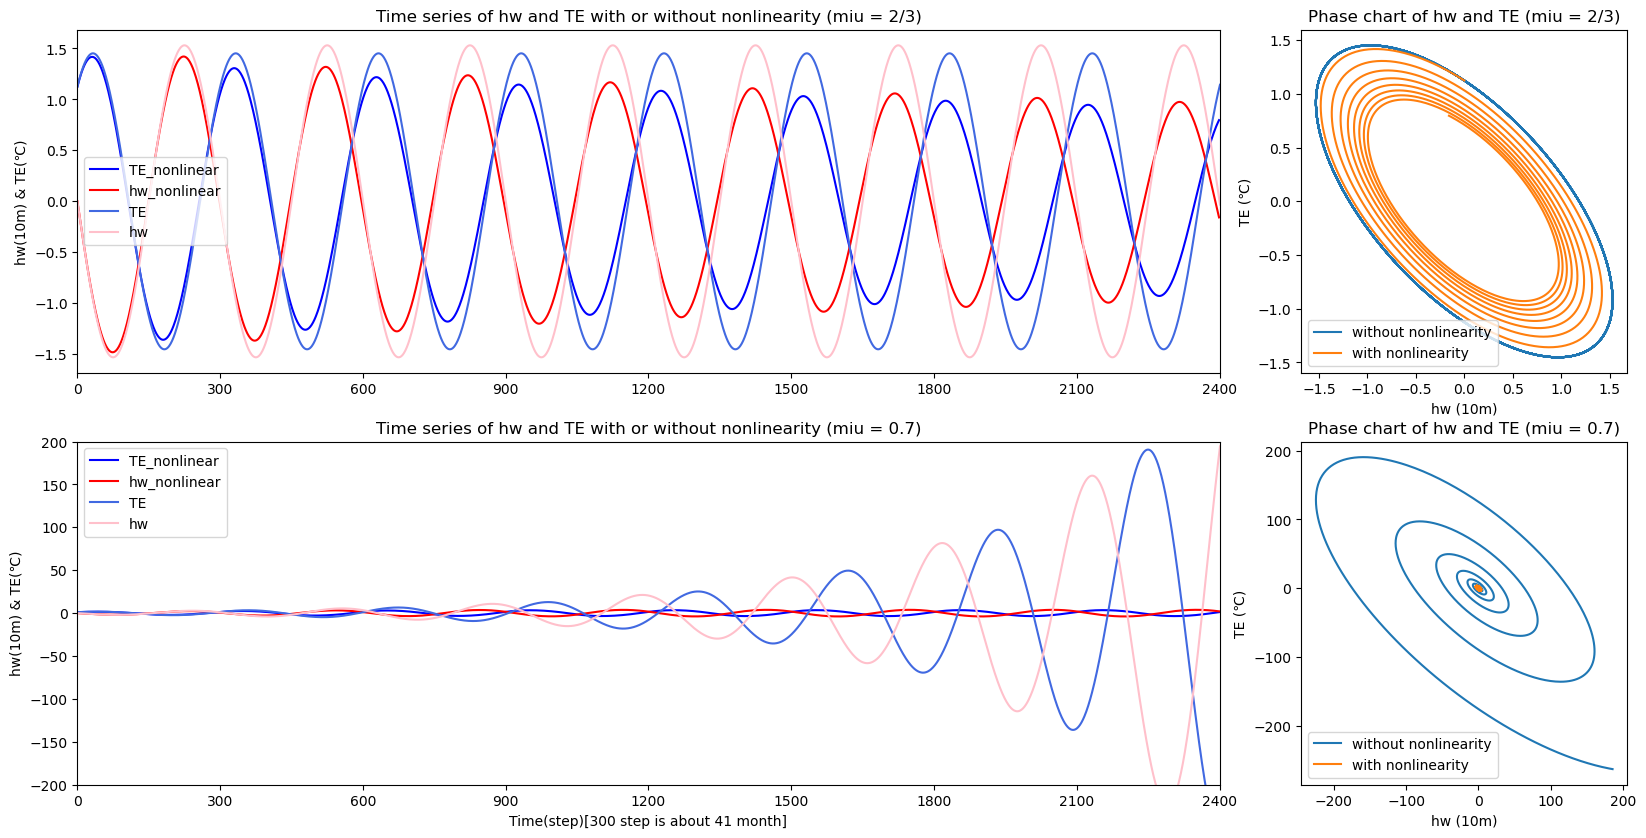

Figure 4 Time series and phase chart of hw and TE with or without nonlinearity with cirtical miu and beyond critical miu


In [15]:
fig = plt.figure(figsize=(20,10), dpi=100) 
grid = plt.GridSpec(2,4,wspace = 0.25,hspace = 0.2)
tick = [0,nt,2*nt,3*nt,4*nt,5*nt,6*nt,7*nt,8*nt]
ax1 = plt.subplot(grid[0,0:3])
ax1.plot(TE_rk_nl*7.5,"blue",label = "TE_nonlinear")
ax1.plot(hw_rk_nl*15,"red",label = "hw_nonlinear")
ax1.plot(TE_rk*7.5,"royalblue",label = "TE")
ax1.plot(hw_rk*15,"pink",label = "hw")
ax1.set_xticks(tick)
ax1.set_xlim(0,8*nt)
ax1.legend()
ax1.set_title("Time series of hw and TE with or without nonlinearity (miu = 2/3)")
ax1.set_ylabel("hw(10m) & TE(℃)")
ax2 = plt.subplot(grid[0,3])
plt.plot(hw_rk*15,TE_rk*7.5,label = "without nonlinearity")
plt.plot(hw_rk_nl*15,TE_rk_nl*7.5,label = "with nonlinearity")
plt.legend()
ax2.set_title("Phase chart of hw and TE (miu = 2/3)")
plt.xlabel("hw (10m)")
plt.ylabel("TE (℃)")
ax3 = plt.subplot(grid[1,0:3])
ax3.plot(TE_rk_nl_l*7.5,"blue",label = "TE_nonlinear")
ax3.plot(hw_rk_nl_l*15,"red",label = "hw_nonlinear")
ax3.plot(TE_rk_miul*7.5,"royalblue",label = "TE")
ax3.plot(hw_rk_miul*15,"pink",label = "hw")
ax3.set_xticks(tick)
ax3.set_xlim(0,8*nt)
ax3.set_ylim(-200,200)
ax3.legend()
ax3.set_title("Time series of hw and TE with or without nonlinearity (miu = 0.7)")
ax3.set_xlabel("Time(step)[300 step is about 41 month]")
ax3.set_ylabel("hw(10m) & TE(℃)")
ax4 = plt.subplot(grid[1,3])
plt.plot(hw_rk_miul[0:8*nt]*15,TE_rk_miul[0:8*nt]*7.5,label = "without nonlinearity")
plt.plot(hw_rk_nl_l*15,TE_rk_nl_l*7.5,label = "with nonlinearity")
plt.legend()
ax4.set_title("Phase chart of hw and TE (miu = 0.7)")
plt.xlabel("hw (10m)")
plt.ylabel("TE (℃)")
plt.show()
print("Figure 4 Time series and phase chart of hw and TE with or without nonlinearity with cirtical miu and beyond critical miu")

In Task D, we modified the model to include the annual cycle in coupling parameter

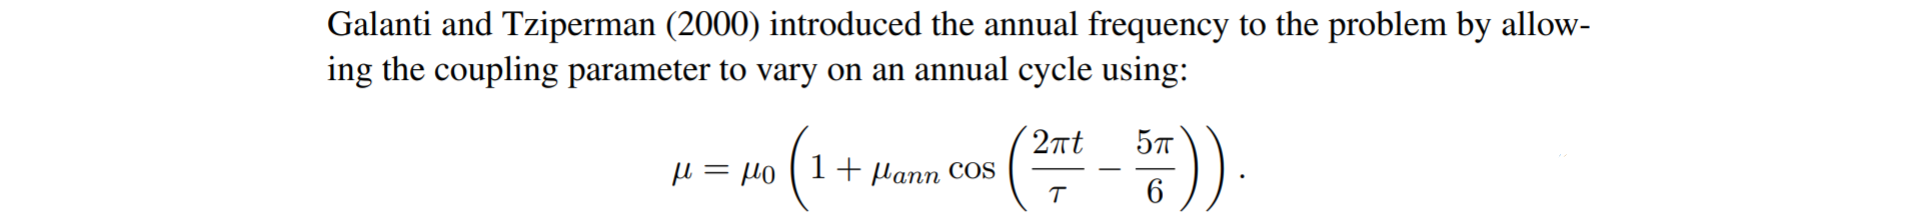

In [16]:
Image.open("annual forcing.png")

In [17]:
### setting values of model parameters for Task D
en = 0.1
miu0,miu_ann = setup_D["miu0"],setup_D["miu_ann"]
nt = 10000
dt = tc/nt

In [18]:
hw_rk_seh, TE_rk_seh = RK_seh(nt,5,h0,T0,R,dt,r,gamma,alpha,b,en,miu0,miu_ann,b0,c)

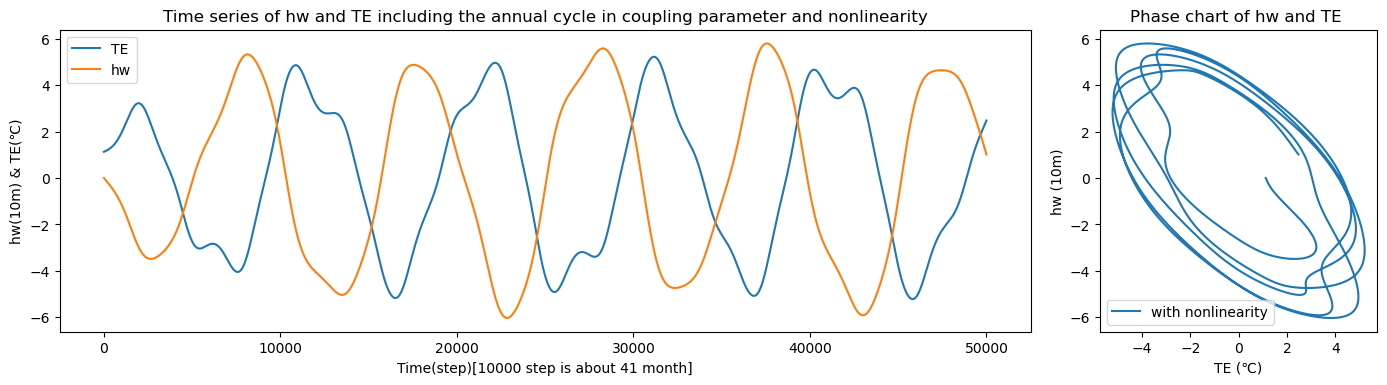

Figure 5 Time series and phase chart of hw and TE including the annual cycle in coupling parameter and nonlinearity


In [19]:
fig = plt.figure(figsize=(17,4), dpi=100) 
grid = plt.GridSpec(1,4,wspace = 0.25,hspace = 0)
ax = plt.subplot(grid[0,0:3])
ax.plot(TE_rk_seh*7.5,label = "TE")
ax.plot(hw_rk_seh*15,label = "hw")
ax.legend()
xtick = [0,nt,nt*2,nt*3,nt*4,nt*5]
ax.set_xticks(xtick)
ax.set_title("Time series of hw and TE including the annual cycle in coupling parameter and nonlinearity")
ax.set_xlabel("Time(step)[10000 step is about 41 month]")
ax.set_ylabel("hw(10m) & TE(℃)")
ax1 = plt.subplot(grid[0,3])
plt.plot(TE_rk_seh*7.5,hw_rk_seh*15,label = "with nonlinearity")
plt.legend()
ax1.set_title("Phase chart of hw and TE ")
plt.ylabel("hw (10m)")
plt.xlabel("TE (℃)")
plt.show()
print("Figure 5 Time series and phase chart of hw and TE including the annual cycle in coupling parameter and nonlinearity")

Figure 5 shows the ROM with annual forcing and nonlinearity. It can be found that the oscillation range is much larger than the cases with critical miu, and there's small oscillations caused by the annual change of miu in the large period taoc (around 41 month),which is obvious especially at the wave crests. However, although the time series figure appears to be irregular, from the phase chart, we can reach the conclusion that the amplitude of hw and TE change slightly in the range of around 60m and 5℃.
This means that by adding an annual cycle on the coupling effect, the trajectory of ENSO is still stable with some differences of maximum temperature in dfferent periods.

In task E, we tested stochastic initiation hypotheses by adding noisy wind forcing to the linear model. The physical parameter is discribed as following:

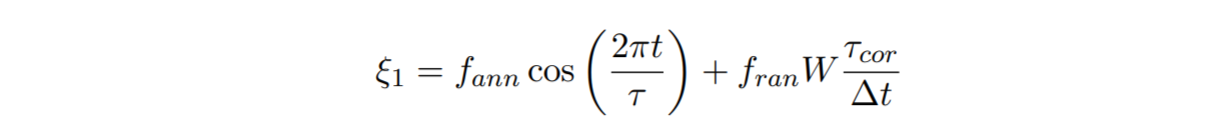

In [20]:
Image.open("wind stress.png")

In [21]:
### setting values of model parameters for Task E
en = 0
fann,fran,tao_cor,dt = setup_D["fann"],setup_D["fran"],setup_D["tao_cor"],setup_D["dt"]
nt = 41*30

In [22]:
hw_RK_sih, TE_RK_sih = RK_sih(nt,5,h0,T0,R,dt,r,gamma,alpha,b,en,miu0,miu_ann,b0,c,fann,fran,tao_cor)

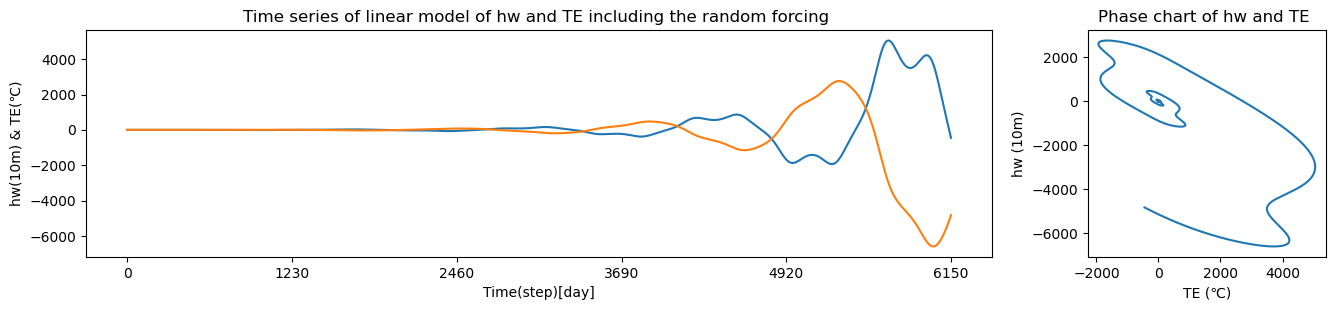

Figure 6 Time series and phase chart of hw and TE including the random forcing and nonlinearity


In [23]:
fig = plt.figure(figsize=(16,3), dpi=100) 
grid = plt.GridSpec(1,4,wspace = 0.4,hspace = 0)
ax = plt.subplot(grid[0,0:3])
ax.plot(TE_RK_sih*7.5,label = "TE")
ax.plot(hw_RK_sih*15,label = "hw")
xtick = [0,nt,nt*2,nt*3,nt*4,nt*5]
ax.set_xticks(xtick)
ax.set_title("Time series of linear model of hw and TE including the random forcing ")
ax.set_xlabel("Time(step)[day]")
ax.set_ylabel("hw(10m) & TE(℃)")
ax1 = plt.subplot(grid[0,3])
plt.plot(TE_RK_sih*7.5,hw_RK_sih*15)
ax1.set_title("Phase chart of hw and TE ")
plt.ylabel("hw (10m)")
plt.xlabel("TE (℃)")
plt.show()
print("Figure 6 Time series and phase chart of hw and TE including the random forcing and nonlinearity")

Figure 6 shows the time series and phases chart of linear model with random forcing. W is randomly pick from -1 to 1. From the time series figure, hw and TE increased slowly in the amplitude in the first 3 periods, and then increased sharply and shows high instability. Similar results can also be found in the phase chart with the large distance away from the start point.

In [24]:
### setting values of model parameters for Task F
en = 0.1
nt = 41*30

In [25]:
hw_RK_sih_F, TE_RK_sih_F = RK_sih(nt,5,h0,T0,R,dt,r,gamma,alpha,b,en,miu0,miu_ann,b0,c,fann,fran,tao_cor)
hw_rk_seh, TE_rk_seh = RK_seh(nt,5,h0,T0,R,dt,r,gamma,alpha,b,en,miu0,miu_ann,b0,c)

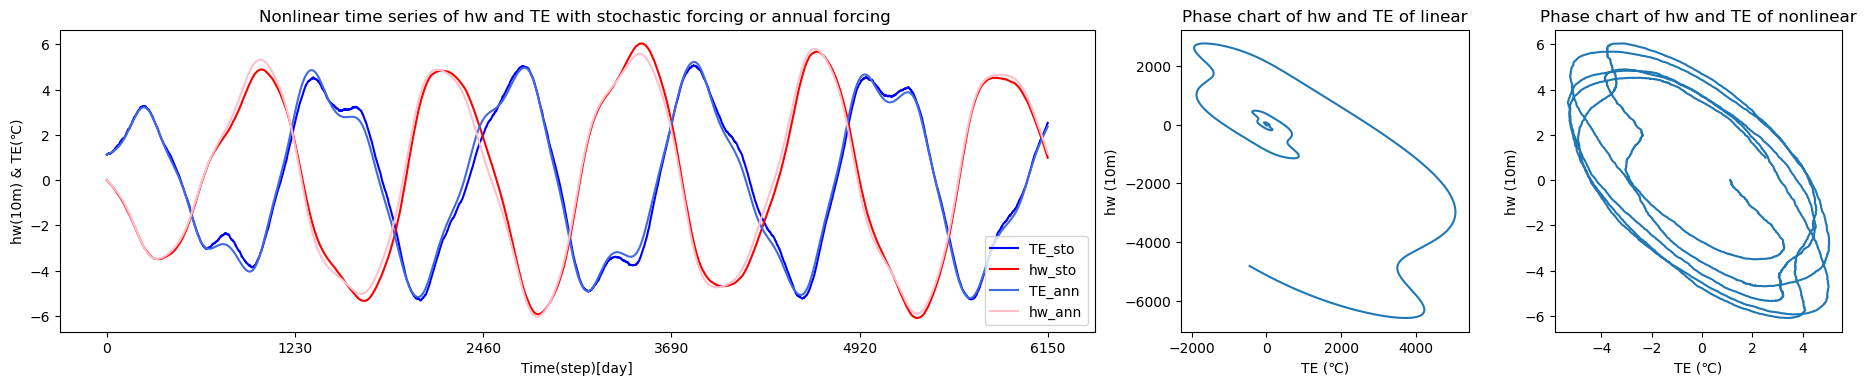

Figure 7 Nonlinear time series of hw and TE with stochastic forcing or annual forcing and the phase charts of linear or nonlinear


In [26]:
fig = plt.figure(figsize=(23,4), dpi=100) 
grid = plt.GridSpec(1,5,wspace = 0.3,hspace = 0.2)
ax = plt.subplot(grid[0,0:3])
ax.plot(TE_RK_sih_F*7.5,"blue",label = "TE_sto")
ax.plot(hw_RK_sih_F*15,"red",label = "hw_sto")
ax.plot(TE_rk_seh*7.5,"royalblue",label = "TE_ann")
ax.plot(hw_rk_seh*15,"pink",label = "hw_ann")
ax.legend()
xtick = [0,nt,nt*2,nt*3,nt*4,nt*5]
ax.set_xticks(xtick)
ax.set_title("Nonlinear time series of hw and TE with stochastic forcing or annual forcing ")
ax.set_xlabel("Time(step)[day]")
ax.set_ylabel("hw(10m) & TE(℃)")
ax1 = plt.subplot(grid[0,3])
plt.plot(TE_RK_sih*7.5,hw_RK_sih*15,label = "linear")
ax1.set_title("Phase chart of hw and TE of linear")
plt.ylabel("hw (10m)")
plt.xlabel("TE (℃)")
ax2 = plt.subplot(grid[0,4])
plt.plot(TE_RK_sih_F*7.5,hw_RK_sih_F*15,label = "nonlinear")
ax2.set_title("Phase chart of hw and TE of nonlinear")
plt.ylabel("hw (10m)")
plt.xlabel("TE (℃)")
plt.show()
print("Figure 7 Nonlinear time series of hw and TE with stochastic forcing or annual forcing and the phase charts of linear or nonlinear")

The time series from figure 7 illustrates that for the nonlinear model, the influence for the annual forcing and stochastic forcing are similar, which has been discribed after figure 5. The main difference between these two is that the stochastic forcing provides a rough line in the oscillation with time step, and the line with annual forcing are much smoother, similar results can also be found by comparing the last phase chart in figure 7 and the one in figure 5. This means that regarding the daily random wind stress forcing, the model produces small swinging in the trajectory, but it's a very small effect.

In Task G we set a group of initial value and test them with the nnlinear model with annual forcing

In [27]:
T = np.zeros((81,nt*5))
h = np.zeros((81,nt*5))
T[:,0] = np.arange(-0.4,0.41,0.01)
h[:,0] = np.arange(-0.2,0.205,0.005)
for i in range(81):
    h[i,:],T[i,:] = RK_seh(nt,5,h[i,0],T[i,0],R,dt,r,gamma,alpha,b,en,miu0,miu_ann,b0,c)

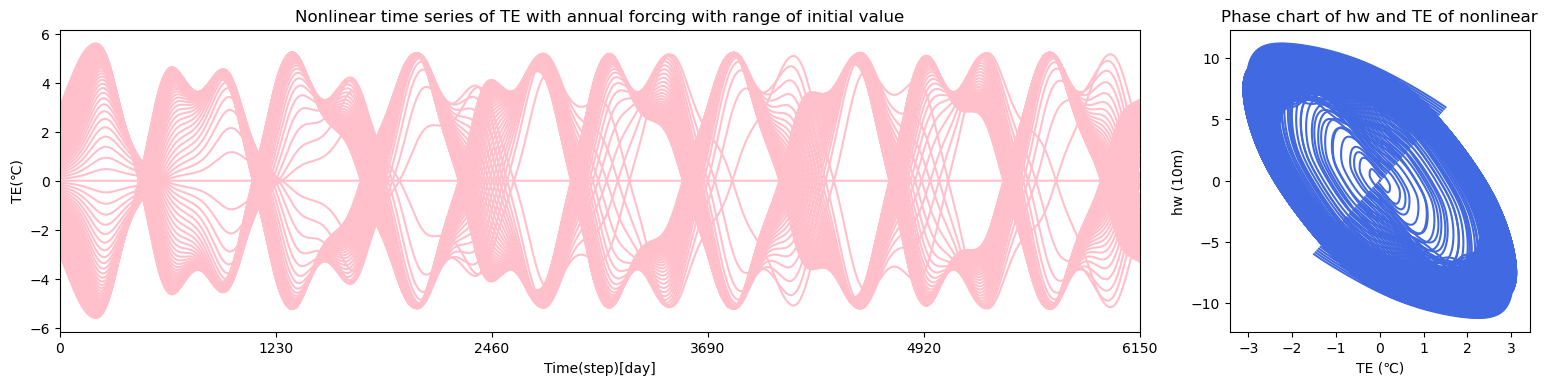

Figure 8 Nonlinear time series of TE with annual forcing with range of initial value and its phase chart of hw and TE


In [28]:
fig = plt.figure(figsize=(24,4), dpi=100) 
grid = plt.GridSpec(1,5,wspace = 0.3,hspace = 0.2)
ax = plt.subplot(grid[0,0:3])
for i in range(81):
    ax.plot(T[i]*7.5,"pink")
xtick = [0,nt,nt*2,nt*3,nt*4,nt*5]
ax.set_xticks(xtick)
ax.set_xlim(0,nt*5)
ax.set_title("Nonlinear time series of TE with annual forcing with range of initial value")
ax.set_xlabel("Time(step)[day]")
ax.set_ylabel("TE(℃)")
ax1 = plt.subplot(grid[0,3])
for i in range(81):
    plt.plot(h[i]*7.5,T[i]*15,"royalblue")
plt.title("Phase chart of hw and TE of nonlinear")
plt.ylabel("hw (10m)")
plt.xlabel("TE (℃)")
plt.show()
print("Figure 8 Nonlinear time series of TE with annual forcing with range of initial value and its phase chart of hw and TE")

It has been simulated 81 ensembles for the solution of ROM adding annual coupling coefficient and random wind stress forcing for different initial conditions. Figure 8 shows the time series of anomaly SST, which can reproduce ENSO signal because the maximum temperature appears around 41 month (1230 days) with phase shifts. From the phase chart we can notice that the model is non-chaotic system. Firstly the seperation is not clear, and the trajectories are non-divergent and do not change in direction. This means the system is not sensitive to the initial conditions.

Reference:
    Jin, F.-F. (1997a). An equatorial ocean recharge paradigm for ENSO: Part I: Conceptual model. J. Atmos. Sci., 54, 811–829.
    Jin, F.-F. (1997b). An equatorial ocean recharge paradigm for ENSO: Part II: A strippeddown coupled model. J. Atmos. Sci., 54, 830–847.